# Imports

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("train.csv")

# Problem 1: Analysis of numeric variables

In [20]:
problem1_df = df[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea']]
Q1 = problem1_df.quantile(0.25)
Q3 = problem1_df.quantile(0.75)
IQR = Q3 - Q1
((problem1_df < (Q1 - 1.5 * IQR)) | (problem1_df > (Q3 + 1.5 * IQR))).sum()

LotArea        69
GrLivArea      31
TotalBsmtSF    61
GarageArea     21
dtype: int64

LotArea has the maximum number of outliers as per box-plot.

In [26]:
problem1_df.skew()

LotArea        12.207688
GrLivArea       1.366560
TotalBsmtSF     1.524255
GarageArea      0.179981
dtype: float64

LotArea is the most skewed from a regular normal distribution. The skew is positive.

In [27]:
problem1_df = df[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'SalePrice']]
problem1_df.corr()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
LotArea,1.000000,0.263116,0.260833,0.180403,0.263843
GrLivArea,0.263116,1.000000,0.454868,0.468997,0.708624
TotalBsmtSF,0.260833,0.454868,1.000000,0.486665,0.613581
GarageArea,0.180403,0.468997,0.486665,1.000000,0.623431
SalePrice,0.263843,0.708624,0.613581,0.623431,1.000000


GrLivArea (0.709) and GarageArea (0.623) should be used as they have the highest correlation with SalePrice.

# Problem 2 : Analysis of Categorical Variables

In [28]:
problem2_df = df[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']]

In [33]:
problem2_df.nunique()

MSSubClass      15
Neighborhood    25
BldgType         5
OverallQual     10
dtype: int64

In [73]:
counts_df = pd.DataFrame()
for col in problem2_df:
  print(col, problem2_df[col].value_counts().max(), problem2_df[col].value_counts().idxmax())

MSSubClass 536 20
Neighborhood 225 NAmes
BldgType 1220 1Fam
OverallQual 397 5


Neighborhood has the highest number of levels (25). 1Fam (BldgType) has the highest number of houses. (1220)

In [93]:
problem2_df = df[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual', 'SalePrice']]
problem2_df = problem2_df.sort_values(by=['SalePrice'])
problem2_df.head()

,MSSubClass,Neighborhood,BldgType,OverallQual,SalePrice
495,30,IDOTRR,1Fam,4,34900
916,20,IDOTRR,1Fam,2,35311
968,50,OldTown,1Fam,3,37900
533,20,BrkSide,1Fam,1,39300
30,70,IDOTRR,1Fam,4,40000


<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

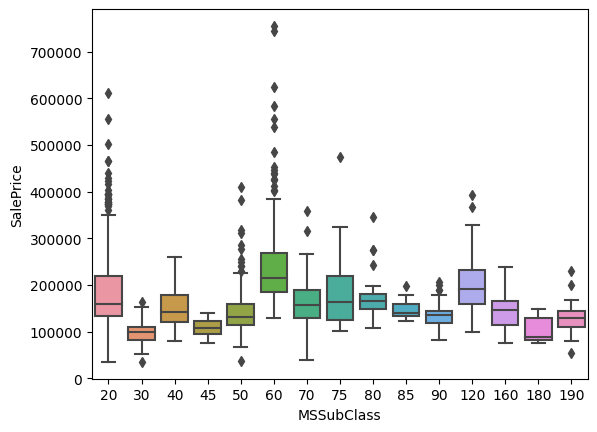

In [95]:
sns.boxplot(problem2_df, x='MSSubClass', y='SalePrice')

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

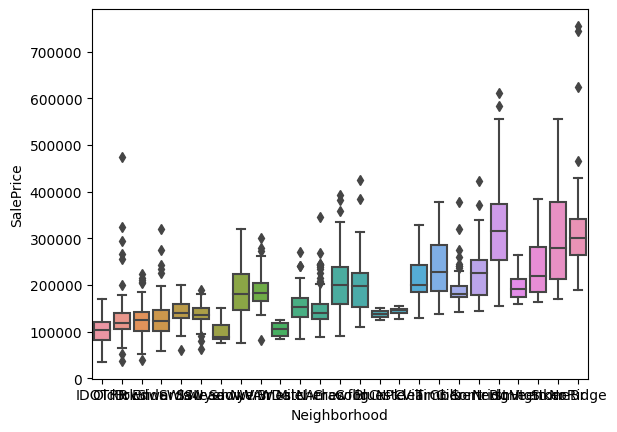

In [92]:
sns.boxplot(problem2_df, x='Neighborhood', y='SalePrice')

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

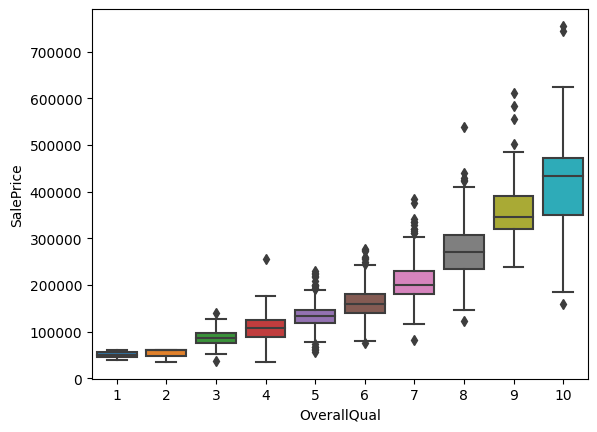

In [96]:
sns.boxplot(problem2_df, x='OverallQual', y='SalePrice')

<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

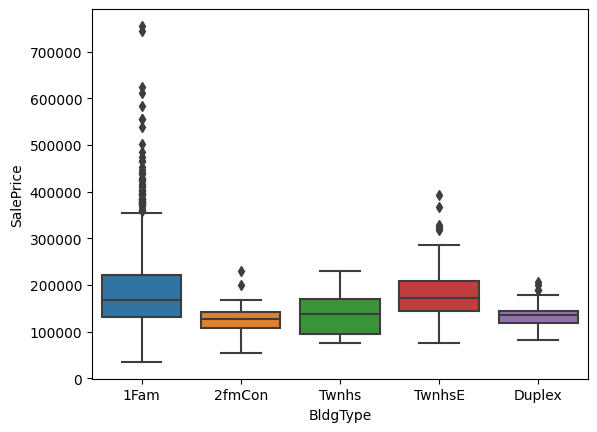

In [97]:
sns.boxplot(problem2_df, x='BldgType', y='SalePrice')

The top 2 variables are Neighborhood and OverallQual.

# Problem 3 : Interesting Questions for EDA

In [43]:
problem3_df = df[['SalePrice', 'GarageType']]


In [44]:
problem3_df['HasGarage'] = problem3_df['GarageType'].notna().copy()

/var/folders/4s/r_bvbp111_jd36z2wncv0gk40000gn/T/ipykernel_13901/1973660815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  problem3_df['HasGarage'] = problem3_df['GarageType'].notna().copy()


<AxesSubplot:xlabel='HasGarage', ylabel='SalePrice'>

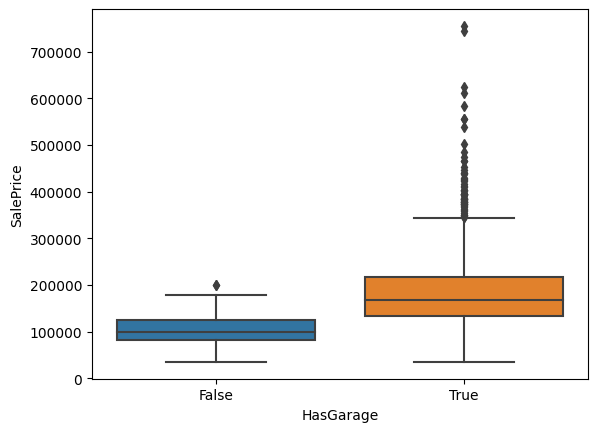

In [41]:
sns.boxplot(problem3_df, x='HasGarage', y='SalePrice')

Yes. The presence of a garage affects the sale price. (Higher)